# Capstone 2

Step 1 of the DSM was already completed, so we'll begin with step 2 of DSM.



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#check current working directory
os.getcwd()

'C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two'

In [3]:
#need to change working directory to data, where the data are saved
path="C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data"
os.chdir(path)

In [4]:
#check and see what files are in data folder
os.listdir()

['Apr2016.xlsx',
 'Aug2016.xlsx',
 'Dec2016.xlsx',
 'Feb2016.xlsx',
 'Jul2016.xlsx',
 'Jun2016.xlsx',
 'Mar2016.xlsx',
 'May2016.xlsx',
 'Nov2016.xlsx',
 'OceanHourlySales2016.xlsx',
 'OceanHourlySales2017.xlsx',
 'Oct2016.xlsx',
 'processed',
 'Sep2016.xlsx']

<font color='teal'> **I'll use both 2016 and 2017 excel files, which has the months of sales in a hourly base in sheets named Jan to Dec**</font>

In [5]:
#read the excels into xls
xls2016 = pd.ExcelFile('OceanHourlySales2016.xlsx')
xls2017 = pd.ExcelFile('OceanHourlySales2017.xlsx')

#read one sheet from 2016 and see its components
df = pd.read_excel(xls2016, 'Dec')
df.head()

Unnamed: 0               Monday              Tuesday            Wednesday  \
0       Time  2016-12-05 00:00:00  2016-12-06 00:00:00  2016-12-07 00:00:00   
1   11:00:00                68.43                41.83                 36.4   
2   12:00:00                48.85                95.09                79.42   
3   13:00:00               101.34               115.09                41.12   
4   14:00:00               129.75                60.77                67.68   

              Thursday               Friday             Saturday  \
0  2016-12-08 00:00:00  2016-12-09 00:00:00  2016-12-10 00:00:00   
1                53.84                24.05                 15.2   
2                36.44                65.03                46.26   
3                80.89                71.51                54.59   
4                63.36                80.83                69.26   

                Sunday      AVG  
0  2016-12-11 00:00:00      NaN  
1                    0    34.25  
2                69.93  63.0029  
3                74.43  76.9957  
4               155.25  89.5571

## Data Definition

In [6]:
#check it's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  85 non-null     object
 1   Monday      83 non-null     object
 2   Tuesday     83 non-null     object
 3   Wednesday   83 non-null     object
 4   Thursday    83 non-null     object
 5   Friday      88 non-null     object
 6   Saturday    75 non-null     object
 7   Sunday      83 non-null     object
 8   AVG         84 non-null     object
dtypes: object(9)
memory usage: 6.7+ KB


In [7]:
#we're going to need the sales from hour to hour, so we'll remove the AVG column
df=df.iloc[:, :8]

#let's also rename unnamed: 0 to Time
df.columns.values[0] = 'Time'
df.head()

Time               Monday              Tuesday            Wednesday  \
0      Time  2016-12-05 00:00:00  2016-12-06 00:00:00  2016-12-07 00:00:00   
1  11:00:00                68.43                41.83                 36.4   
2  12:00:00                48.85                95.09                79.42   
3  13:00:00               101.34               115.09                41.12   
4  14:00:00               129.75                60.77                67.68   

              Thursday               Friday             Saturday  \
0  2016-12-08 00:00:00  2016-12-09 00:00:00  2016-12-10 00:00:00   
1                53.84                24.05                 15.2   
2                36.44                65.03                46.26   
3                80.89                71.51                54.59   
4                63.36                80.83                69.26   

                Sunday  
0  2016-12-11 00:00:00  
1                    0  
2                69.93  
3                74.43  
4               155.25

In [8]:
#we don't need the Total AM/PM rows
df = df[~df['Time'].isin(['AM', 'PM', 'Total'])]

#let's check the rows' indexs again
df['Time'].value_counts()

13:00:00    5
Time        5
18:00:00    5
17:00:00    5
15:00:00    5
12:00:00    5
23:00:00    5
21:00:00    5
20:00:00    5
19:00:00    5
14:00:00    5
16:00:00    5
11:00:00    5
22:00:00    5
Name: Time, dtype: int64

In [9]:
#checking df's last 15 rows, since there should be 4 weeks in a month, yet there's 5 values for each hour
df.tail(15)

Time   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday  \
75       NaN      NaN      NaN        NaN       NaN      NaN       NaN   
76      Time   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   
77  11:00:00   59.345  40.9275      40.43   51.7425  46.2925    39.965   
78  12:00:00    54.03   73.095    61.2575   47.8225    78.42    136.53   
79  13:00:00  85.6525  109.755    89.2975   78.3975    74.37   104.655   
80  14:00:00  106.422   88.945      71.08    79.175    82.97    157.65   
81  15:00:00  105.845  106.527    91.8625     89.93    98.09   147.985   
82  16:00:00    139.3  104.838    91.5275   148.685   118.43   120.882   
83  17:00:00   87.195   63.935    95.0225   59.4675  67.4725   104.493   
84  18:00:00    72.57  92.3675    85.5425     76.61  78.7875    74.335   
85  19:00:00   74.135    80.79    93.1825     66.15    95.61     62.04   
86  20:00:00    80.12  93.9125     66.835   76.8175    81.76    114.02   
87  21:00:00  91.1925  103.615     91.445   108.593   97.015     80.01   
88  22:00:00    62.82  65.8075    92.4925    71.815  112.348     52.89   
89  23:00:00      NaN      NaN        NaN       NaN    65.23    38.185   

     Sunday  
75      NaN  
76   Sunday  
77   20.045  
78   84.345  
79  124.775  
80  135.968  
81  203.648  
82  130.868  
83  112.668  
84  120.463  
85  84.1975  
86  73.3475  
87    87.23  
88  71.9325  
89      NaN

In [10]:
#remove empty rows, so we'll drop rows where the value is NaN in the Time column
df.dropna(subset = ['Time'], inplace=True)
df.tail(15)

Time   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday  \
70  23:00:00      NaN      NaN        NaN       NaN    35.21       NaN   
76      Time   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   
77  11:00:00   59.345  40.9275      40.43   51.7425  46.2925    39.965   
78  12:00:00    54.03   73.095    61.2575   47.8225    78.42    136.53   
79  13:00:00  85.6525  109.755    89.2975   78.3975    74.37   104.655   
80  14:00:00  106.422   88.945      71.08    79.175    82.97    157.65   
81  15:00:00  105.845  106.527    91.8625     89.93    98.09   147.985   
82  16:00:00    139.3  104.838    91.5275   148.685   118.43   120.882   
83  17:00:00   87.195   63.935    95.0225   59.4675  67.4725   104.493   
84  18:00:00    72.57  92.3675    85.5425     76.61  78.7875    74.335   
85  19:00:00   74.135    80.79    93.1825     66.15    95.61     62.04   
86  20:00:00    80.12  93.9125     66.835   76.8175    81.76    114.02   
87  21:00:00  91.1925  103.615     91.445   108.593   97.015     80.01   
88  22:00:00    62.82  65.8075    92.4925    71.815  112.348     52.89   
89  23:00:00      NaN      NaN        NaN       NaN    65.23    38.185   

     Sunday  
70      NaN  
76   Sunday  
77   20.045  
78   84.345  
79  124.775  
80  135.968  
81  203.648  
82  130.868  
83  112.668  
84  120.463  
85  84.1975  
86  73.3475  
87    87.23  
88  71.9325  
89      NaN

In [11]:
#the last week is the weekly average, let's remove that, we'll do so by removing the last 14 rows
#but we need to make sure the previous rows are good, so we'll do so if there exist a value named 'Monday'
#on the [-14] row's Monday column (it's supposed to be the date, only the avg week has the value as Monday)
if df.iloc[-14]['Monday'] == 'Monday':
    df = df[:-14]
df.tail(15)

Time               Monday              Tuesday            Wednesday  \
51  23:00:00                  NaN                  NaN                  NaN   
57      Time  2016-12-26 00:00:00  2016-12-27 00:00:00  2016-12-28 00:00:00   
58  11:00:00                22.27                38.19                11.91   
59  12:00:00                 16.3                64.58                62.75   
60  13:00:00                 70.9               130.33                 88.9   
61  14:00:00                96.56                71.25                71.52   
62  15:00:00               151.16               122.81                91.35   
63  16:00:00                94.81                69.89               127.88   
64  17:00:00               161.21               113.45                98.31   
65  18:00:00                86.37                97.48               119.95   
66  19:00:00                63.45                91.44                72.52   
67  20:00:00                38.99               104.89                75.88   
68  21:00:00               100.08                90.97                132.5   
69  22:00:00                61.02                67.15                205.7   
70  23:00:00                  NaN                  NaN                  NaN   

               Thursday               Friday             Saturday  \
51                  NaN                90.48                  NaN   
57  2016-12-29 00:00:00  2016-12-30 00:00:00  2016-12-31 00:00:00   
58                48.54                30.98                34.22   
59                 44.9                69.24                66.94   
60               121.44               118.86               129.39   
61                85.99                74.31               226.19   
62                140.9               126.38               147.41   
63               174.19                52.98               179.84   
64                 61.1                64.58                  NaN   
65                96.84                66.92                  NaN   
66               151.06               120.79                  NaN   
67               107.59                  100                  NaN   
68               173.27               115.13                  NaN   
69                 94.4               122.65                  NaN   
70                  NaN                35.21                  NaN   

                 Sunday  
51                  NaN  
57  2017-01-01 00:00:00  
58                 35.7  
59                78.57  
60               150.28  
61               137.23  
62               231.21  
63               127.24  
64               108.06  
65                128.6  
66                85.69  
67                62.06  
68               117.45  
69                89.25  
70                  NaN

In [12]:
#we need to make it to a wide list, so we'll merge them from left to right 3~4 times to make a month
#before that, lets reset the index
df.reset_index(drop=True, inplace=True)

In [13]:
#week one is row 0~13 which is df[0:14], week2 is 14~27, week3 is 28~41, week4 is 42~55
#occassionaly there might be week5, which is 56~69, we'll do so if len(df)>60
df1 = df[:14]
df2 = df[14:28]
df3 = df[28:42]
df4 = df[42:56]
if len(df) > 60:
    df5 = df[56:70]
else:
    df5 = 0

#let's merge them, need reduce function
from functools import reduce
if df5 == True:
    dfm = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4, df5])
else:
    dfm = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4])
dfm.head()

Time             Monday_x            Tuesday_x          Wednesday_x  \
0      Time  2016-12-05 00:00:00  2016-12-06 00:00:00  2016-12-07 00:00:00   
1  11:00:00                68.43                41.83                 36.4   
2  12:00:00                48.85                95.09                79.42   
3  13:00:00               101.34               115.09                41.12   
4  14:00:00               129.75                60.77                67.68   

            Thursday_x             Friday_x           Saturday_x  \
0  2016-12-08 00:00:00  2016-12-09 00:00:00  2016-12-10 00:00:00   
1                53.84                24.05                 15.2   
2                36.44                65.03                46.26   
3                80.89                71.51                54.59   
4                63.36                80.83                69.26   

              Sunday_x             Monday_y            Tuesday_y  ...  \
0  2016-12-11 00:00:00  2016-12-12 00:00:00  2016-12-13 00:00:00  ...   
1                    0                77.04                48.58  ...   
2                69.93                67.85                74.24  ...   
3                74.43                62.54               163.14  ...   
4               155.25                78.38                142.5  ...   

              Friday_x           Saturday_x             Sunday_x  \
0  2016-12-23 00:00:00  2016-12-24 00:00:00  2016-12-25 00:00:00   
1                58.57                37.85                14.65   
2                76.66                 26.5               110.04   
3                16.19                114.4               146.68   
4                 93.8               164.75               143.11   

              Monday_y            Tuesday_y          Wednesday_y  \
0  2016-12-26 00:00:00  2016-12-27 00:00:00  2016-12-28 00:00:00   
1                22.27                38.19                11.91   
2                 16.3                64.58                62.75   
3                 70.9               130.33                 88.9   
4                96.56                71.25                71.52   

            Thursday_y             Friday_y           Saturday_y  \
0  2016-12-29 00:00:00  2016-12-30 00:00:00  2016-12-31 00:00:00   
1                48.54                30.98                34.22   
2                 44.9                69.24                66.94   
3               121.44               118.86               129.39   
4                85.99                74.31               226.19   

              Sunday_y  
0  2017-01-01 00:00:00  
1                 35.7  
2                78.57  
3               150.28  
4               137.23  

[5 rows x 29 columns]

In [14]:
#we'll now make it into a long list by trasnposing the df
dft = dfm.T
dft.head()

0         1         2         3         4   \
Time                        Time  11:00:00  12:00:00  13:00:00  14:00:00   
Monday_x     2016-12-05 00:00:00     68.43     48.85    101.34    129.75   
Tuesday_x    2016-12-06 00:00:00     41.83     95.09    115.09     60.77   
Wednesday_x  2016-12-07 00:00:00      36.4     79.42     41.12     67.68   
Thursday_x   2016-12-08 00:00:00     53.84     36.44     80.89     63.36   

                   5         6         7         8         9         10  \
Time         15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00   
Monday_x        73.37    131.18     70.78     81.61     59.58      36.2   
Tuesday_x      105.77       177      41.1     62.75     90.57     81.64   
Wednesday_x      80.8        68     86.02     58.55     87.37     19.75   
Thursday_x      58.94    123.91     50.59     54.24      23.7     38.58   

                   11        12        13  
Time         21:00:00  22:00:00  23:00:00  
Monday_x        81.02     49.03       NaN  
Tuesday_x       65.03      20.1       NaN  
Wednesday_x     19.64     28.65       NaN  
Thursday_x     103.92     53.35       NaN

In [15]:
#rename the columns to first row
dft.columns = dft.iloc[0]
dft.head()

Time                        Time  11:00:00  12:00:00  13:00:00  14:00:00  \
Time                        Time  11:00:00  12:00:00  13:00:00  14:00:00   
Monday_x     2016-12-05 00:00:00     68.43     48.85    101.34    129.75   
Tuesday_x    2016-12-06 00:00:00     41.83     95.09    115.09     60.77   
Wednesday_x  2016-12-07 00:00:00      36.4     79.42     41.12     67.68   
Thursday_x   2016-12-08 00:00:00     53.84     36.44     80.89     63.36   

Time         15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
Time         15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00   
Monday_x        73.37    131.18     70.78     81.61     59.58      36.2   
Tuesday_x      105.77       177      41.1     62.75     90.57     81.64   
Wednesday_x      80.8        68     86.02     58.55     87.37     19.75   
Thursday_x      58.94    123.91     50.59     54.24      23.7     38.58   

Time         21:00:00  22:00:00  23:00:00  
Time         21:00:00  22:00:00  23:00:00  
Monday_x        81.02     49.03       NaN  
Tuesday_x       65.03      20.1       NaN  
Wednesday_x     19.64     28.65       NaN  
Thursday_x     103.92     53.35       NaN

In [16]:
dft.columns

Index([  'Time', 11:00:00, 12:00:00, 13:00:00, 14:00:00, 15:00:00, 16:00:00,
       17:00:00, 18:00:00, 19:00:00, 20:00:00, 21:00:00, 22:00:00, 23:00:00],
      dtype='object', name='Time')

In [17]:
#changing the 1st column index to Date to set it as row index later
dft = dft.rename(columns={'Time': 'Date'})
dft.head()

Time                        Date  11:00:00  12:00:00  13:00:00  14:00:00  \
Time                        Time  11:00:00  12:00:00  13:00:00  14:00:00   
Monday_x     2016-12-05 00:00:00     68.43     48.85    101.34    129.75   
Tuesday_x    2016-12-06 00:00:00     41.83     95.09    115.09     60.77   
Wednesday_x  2016-12-07 00:00:00      36.4     79.42     41.12     67.68   
Thursday_x   2016-12-08 00:00:00     53.84     36.44     80.89     63.36   

Time         15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
Time         15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00   
Monday_x        73.37    131.18     70.78     81.61     59.58      36.2   
Tuesday_x      105.77       177      41.1     62.75     90.57     81.64   
Wednesday_x      80.8        68     86.02     58.55     87.37     19.75   
Thursday_x      58.94    123.91     50.59     54.24      23.7     38.58   

Time         21:00:00  22:00:00  23:00:00  
Time         21:00:00  22:00:00  23:00:00  
Monday_x        81.02     49.03       NaN  
Tuesday_x       65.03      20.1       NaN  
Wednesday_x     19.64     28.65       NaN  
Thursday_x     103.92     53.35       NaN

In [18]:
#setting row index
dft = dft.set_index('Date')
dft.head()

Time                 11:00:00  12:00:00  13:00:00  14:00:00  15:00:00  \
Date                                                                    
Time                 11:00:00  12:00:00  13:00:00  14:00:00  15:00:00   
2016-12-05 00:00:00     68.43     48.85    101.34    129.75     73.37   
2016-12-06 00:00:00     41.83     95.09    115.09     60.77    105.77   
2016-12-07 00:00:00      36.4     79.42     41.12     67.68      80.8   
2016-12-08 00:00:00     53.84     36.44     80.89     63.36     58.94   

Time                 16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
Date                                                                    
Time                 16:00:00  17:00:00  18:00:00  19:00:00  20:00:00   
2016-12-05 00:00:00    131.18     70.78     81.61     59.58      36.2   
2016-12-06 00:00:00       177      41.1     62.75     90.57     81.64   
2016-12-07 00:00:00        68     86.02     58.55     87.37     19.75   
2016-12-08 00:00:00    123.91     50.59     54.24      23.7     38.58   

Time                 21:00:00  22:00:00  23:00:00  
Date                                               
Time                 21:00:00  22:00:00  23:00:00  
2016-12-05 00:00:00     81.02     49.03       NaN  
2016-12-06 00:00:00     65.03      20.1       NaN  
2016-12-07 00:00:00     19.64     28.65       NaN  
2016-12-08 00:00:00    103.92     53.35       NaN

In [19]:
#remove first row
dft = dft.iloc[1:]
dft.head()

Time                11:00:00 12:00:00 13:00:00 14:00:00 15:00:00 16:00:00  \
Date                                                                        
2016-12-05 00:00:00    68.43    48.85   101.34   129.75    73.37   131.18   
2016-12-06 00:00:00    41.83    95.09   115.09    60.77   105.77      177   
2016-12-07 00:00:00     36.4    79.42    41.12    67.68     80.8       68   
2016-12-08 00:00:00    53.84    36.44    80.89    63.36    58.94   123.91   
2016-12-09 00:00:00    24.05    65.03    71.51    80.83   112.93   168.33   

Time                17:00:00 18:00:00 19:00:00 20:00:00 21:00:00 22:00:00  \
Date                                                                        
2016-12-05 00:00:00    70.78    81.61    59.58     36.2    81.02    49.03   
2016-12-06 00:00:00     41.1    62.75    90.57    81.64    65.03     20.1   
2016-12-07 00:00:00    86.02    58.55    87.37    19.75    19.64    28.65   
2016-12-08 00:00:00    50.59    54.24     23.7    38.58   103.92    53.35   
2016-12-09 00:00:00   106.57    86.65    98.62    28.81    94.93    80.51   

Time                23:00:00  
Date                          
2016-12-05 00:00:00      NaN  
2016-12-06 00:00:00      NaN  
2016-12-07 00:00:00      NaN  
2016-12-08 00:00:00      NaN  
2016-12-09 00:00:00     57.1

# Defining Function to clean data
The goal is to compile all 2016's sales in one df, and 2017 in another, with both data starting with Monday, with no missing days in between. So we can check their covariance/correlation and see if days of the week/year matter.

In [20]:
#function that takes in a dataframe and returns a cleaned dataframe
def clean_data(df):
    #we're going to need the sales from hour to hour, so we'll remove the AVG column
    df=df.iloc[:, :8]

    #let's also rename unnamed: 0 to Time
    df.columns.values[0] = 'Time'
    
    #we don't need the Total AM/PM rows
    df = df[~df['Time'].isin(['AM', 'PM', 'Total'])]

    #let's remove the rows that has Monday~Sunday, we already have the weekday indicated by column index
    #We also need to remove empty rows, so we'll drop rows where the value is NaN in the Time column
    df.dropna(subset = ['Time'], inplace=True)
    
    #the last week is the weekly average, let's remove that, we'll do so by removing the last 14 rows
    #but we need to make sure the previous rows are good, so we'll do so if there exist a value named 'Monday'
    #on the [-14] row's Monday column (it's supposed to be the date, only the avg week has the value as Monday)
    if df.iloc[-14]['Monday'] == 'Monday':
        df = df[:-14]
    
    #we need to make it to a wide list, so we'll merge them from left to right 3~4 times to make a month
    #before that, lets reset the index
    df.reset_index(drop=True, inplace=True)
    
    #week one is row 0~13 which is df[0:14], week2 is 14~27, week3 is 28~41, week4 is 42~55
    #occassionaly there might be week5, which is 56~69, we'll do so if len(df)>60
    #let's merge them, need reduce function
    from functools import reduce
    df1 = df[:14]
    df2 = df[14:28]
    df3 = df[28:42]
    df4 = df[42:56]
    if len(df) > 60:
        df5 = df[56:70]
        dfm = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4, df5])
    else:
        dfm = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4])
  
    #we'll now make it into a long list by trasnposing the df
    dft = dfm.T
    
    #rename the columns to first row
    dft.columns = dft.iloc[0]
    
    #changing the 1st column index to Date to set it as row index later
    dft = dft.rename(columns={'Time': 'Date'})
    
    #setting row index
    dft = dft.set_index('Date')
    
    #remove first row
    dft = dft.iloc[1:]
    return dft

In [21]:
#read the rest of the sheets into dataframes
#make a month list to iterate
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#dict comprehension
dict_2016 = {month:pd.read_excel(xls2016, month) for month in month_list}
dict_2017 = {month:pd.read_excel(xls2017, month) for month in month_list}

In [249]:
#combine all the dfs by year, but we have to clean them first
df2016 = pd.concat([clean_data(dict_2016[month]) for month in month_list])
df2017 = pd.concat([clean_data(dict_2017[month]) for month in month_list])

#then combine both years to df24 for 24 months, so we can check both df at once
df24 = pd.concat([df2016, df2017])
df24.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2016-01-04 to 2017-12-31
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   11:00:00  720 non-null    object
 1   12:00:00  721 non-null    object
 2   13:00:00  722 non-null    object
 3   14:00:00  722 non-null    object
 4   15:00:00  722 non-null    object
 5   16:00:00  722 non-null    object
 6   17:00:00  719 non-null    object
 7   18:00:00  715 non-null    object
 8   19:00:00  712 non-null    object
 9   20:00:00  711 non-null    object
 10  21:00:00  711 non-null    object
 11  22:00:00  707 non-null    object
 12  23:00:00  206 non-null    object
dtypes: object(13)
memory usage: 79.6+ KB


# Check the compiled df for error/NaN/outlier... etc.

In [23]:
df24.columns

Index([11:00:00, 12:00:00, 13:00:00, 14:00:00, 15:00:00, 16:00:00, 17:00:00,
       18:00:00, 19:00:00, 20:00:00, 21:00:00, 22:00:00, 23:00:00],
      dtype='object', name='Time')

In [250]:
#change the Dtype in Mon~Sunday to float
df2016 = df2016.apply(pd.to_numeric, errors='ignore')
df2017 = df2017.apply(pd.to_numeric, errors='ignore')

#check df info again
df24.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2016-01-04 to 2017-12-31
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   11:00:00  720 non-null    object
 1   12:00:00  721 non-null    object
 2   13:00:00  722 non-null    object
 3   14:00:00  722 non-null    object
 4   15:00:00  722 non-null    object
 5   16:00:00  722 non-null    object
 6   17:00:00  719 non-null    object
 7   18:00:00  715 non-null    object
 8   19:00:00  712 non-null    object
 9   20:00:00  711 non-null    object
 10  21:00:00  711 non-null    object
 11  22:00:00  707 non-null    object
 12  23:00:00  206 non-null    object
dtypes: object(13)
memory usage: 79.6+ KB


In [25]:
#check for min/max to see if anything is unusual
print(df24.max())
print(df24.min())

Time
11:00:00    226.18
12:00:00    406.42
13:00:00    254.23
14:00:00    301.34
15:00:00    358.54
16:00:00    292.96
17:00:00    264.70
18:00:00    256.90
19:00:00    271.32
20:00:00    272.32
21:00:00    215.14
22:00:00    237.25
23:00:00    177.46
dtype: float64
Time
11:00:00     0.00
12:00:00    11.87
13:00:00     7.25
14:00:00    12.15
15:00:00    23.81
16:00:00    28.44
17:00:00    20.68
18:00:00     7.00
19:00:00    14.48
20:00:00    19.65
21:00:00    15.50
22:00:00     4.00
23:00:00     3.99
dtype: float64


In [251]:
#since there's no unusual numbers, we'll keep the NaN as it is, b/c Nan means the store wasnt open at that hour
#let's add a new column to indicate the daily sales and name it df24['Daily']
df24['Daily'] = df24.apply(lambda row: row.sum(), axis = 1) 
df2016['Daily'] = df2016.apply(lambda row: row.sum(), axis = 1) 
df2017['Daily'] = df2017.apply(lambda row: row.sum(), axis = 1) 
df24.head()

Time       11:00:00 12:00:00 13:00:00 14:00:00 15:00:00 16:00:00 17:00:00  \
Date                                                                        
2016-01-04    16.39    36.27    78.68    51.44     57.7   148.93    74.55   
2016-01-05    22.45    27.75     7.25    30.64   100.67   149.72    43.14   
2016-01-06    33.59    41.48   111.56       92    94.83    94.27    45.26   
2016-01-07      8.4     23.3    54.49    42.28   116.13   101.65    52.04   
2016-01-08    27.25       86    48.34    65.21    186.2   158.67    93.76   

Time       18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00    Daily  
Date                                                                       
2016-01-04    50.34    56.02    79.35    58.34    31.68      NaN   739.69  
2016-01-05    68.53    93.65     75.9    27.45     31.7      NaN   678.85  
2016-01-06    70.35    57.22    52.53    46.87    49.12      NaN   789.08  
2016-01-07    47.96      128    77.01    91.02    75.42      NaN   817.70  
2016-01-08    117.3   143.23    105.7   182.96    89.71    64.12  1368.45

In [27]:
#let's use describe to see the min/max and 75%
df24['Daily'].describe()

count     728.000000
mean     1205.746659
std       294.434415
min         0.000000
25%      1028.817500
50%      1204.730000
75%      1374.962500
max      2795.950000
Name: Daily, dtype: float64

In [28]:
#let's check the days with over 1962; that's 75% + 2 std
df24.loc[df24['Daily'] > 1962]

#they don't have any huge number in an hour, these days just happened to be very busy

Time       11:00:00 12:00:00 13:00:00 14:00:00 15:00:00 16:00:00 17:00:00  \
Date                                                                        
2016-05-01    77.55   123.77   185.81   221.38   220.77   259.26   187.89   
2017-08-31   150.21   228.03   142.35   176.46   321.18   256.74   150.99   
2017-09-01   224.96   264.04   210.29   213.52   253.81   216.95   230.17   
2017-09-02   173.97   282.15   182.63   242.13   312.23   292.96   187.25   
2017-09-26   184.95    190.8   162.99   197.43   190.33   287.42   119.08   
2017-10-06    141.3   216.29   167.76   260.65   282.04   204.99   181.84   
2017-10-24    81.12   187.59   115.03   216.03   286.41   187.61    264.7   

Time       18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00    Daily  
Date                                                                       
2016-05-01   147.74   157.63   180.57   134.91    84.68      NaN  1981.96  
2017-08-31   238.12   105.22   131.27   192.93     92.6      NaN  2186.10  
2017-09-01   210.36   271.32   272.32   205.51   162.31    60.39  2795.95  
2017-09-02    256.9   150.05   166.69   149.25   176.22    85.13  2657.56  
2017-09-26   190.94   159.76   107.04   124.28    95.07      NaN  2010.09  
2017-10-06   106.83    142.5   162.91   128.98    93.37    58.04  2147.50  
2017-10-24    161.5   141.26    93.34   165.62    67.14      NaN  1967.35

In [29]:
#let's check the days with less than 441; that's 25% - 2 std
df24.loc[df24['Daily'] < 441]

Time       11:00:00 12:00:00 13:00:00 14:00:00 15:00:00 16:00:00 17:00:00  \
Date                                                                        
2016-03-15      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2016-03-17      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-06-19      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-06-20      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-06-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-06-22      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

Time       18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00  Daily  
Date                                                                     
2016-03-15      NaN      NaN      NaN      NaN      NaN      NaN    0.0  
2016-03-17      NaN      NaN      NaN      NaN      NaN      NaN    0.0  
2017-06-19      NaN      NaN      NaN      NaN      NaN      NaN    0.0  
2017-06-20      NaN      NaN      NaN      NaN      NaN      NaN    0.0  
2017-06-21      NaN      NaN      NaN      NaN      NaN      NaN    0.0  
2017-06-22      NaN      NaN      NaN      NaN      NaN      NaN    0.0

In [252]:
#the days with less than 441 were NaNs, so we'll replace those rows' Daily sales with that year's daily average
df2016['Daily'] = df2016['Daily'].replace([0], df2016['Daily'].mean())
df2017['Daily'] = df2017['Daily'].replace([0], df2017['Daily'].mean())

#concat again to make df24
df24 = pd.concat([df2016, df2017])

#check the minimum daily sales to make sure there's no 0
df24['Daily'].min()

465.07

In [31]:
#in order to plot both 2016 and 2017 in the same graph, we'll let the x be the day of the year, so it'll be range(365)
df2016r = df2016.reset_index(drop=True)
df2017r = df2017.reset_index(drop=True)
df2016r.head()

Time  11:00:00  12:00:00  13:00:00  14:00:00  15:00:00  16:00:00  17:00:00  \
0        16.39     36.27     78.68     51.44     57.70    148.93     74.55   
1        22.45     27.75      7.25     30.64    100.67    149.72     43.14   
2        33.59     41.48    111.56     92.00     94.83     94.27     45.26   
3         8.40     23.30     54.49     42.28    116.13    101.65     52.04   
4        27.25     86.00     48.34     65.21    186.20    158.67     93.76   

Time  18:00:00  19:00:00  20:00:00  21:00:00  22:00:00  23:00:00    Daily  
0        50.34     56.02     79.35     58.34     31.68       NaN   739.69  
1        68.53     93.65     75.90     27.45     31.70       NaN   678.85  
2        70.35     57.22     52.53     46.87     49.12       NaN   789.08  
3        47.96    128.00     77.01     91.02     75.42       NaN   817.70  
4       117.30    143.23    105.70    182.96     89.71     64.12  1368.45

In [32]:
#let's check the number of days in each data
print('df2016r has ' + str(len(df2016r)) + ' days of data, starting with Monday.')
print('df2017r has ' + str(len(df2017r)) + ' days of data, starting with Monday.')

df2016r has 364 days of data, starting with Monday.
df2017r has 364 days of data, starting with Monday.


# EXPLORATORY ANALYSIS

# Daily Sales Correlation

In [33]:
# calculate covariance matrix
from numpy import cov
covariance = cov(df2016['Daily'], df2017['Daily'])
print('covariance:' + str(covariance))

#Pearson’s Correlation
from scipy.stats import pearsonr
pearson = pearsonr(df2016['Daily'], df2017['Daily'])
print('pearson:' + str(pearson))

#spearman's Correlation
from scipy.stats import spearmanr
spearman = spearmanr(df2016['Daily'], df2017['Daily'])
print(str(spearman))

covariance:[[62117.78571239 20981.18889104]
 [20981.18889104 85786.11972465]]
pearson:(0.28741775872175984, 2.3646408535589583e-08)
SpearmanrResult(correlation=0.2976749011946796, pvalue=6.973880384001761e-09)


The correlation and covariance were all positive, indicating that when the sales at a certain day is increasing in 2016 it is likely to be increasing in 2017 as well. However, the correlation isn't too high, so we'll now break the datasets down to sales by month to calculate the correlation.

In [34]:
#let's make a list of monthly sales for each year
list2016m = [sum(df2016r.Daily[30*i:((i+1)*30)]) for i in range(12)]
list2017m = [sum(df2017r.Daily[30*i:((i+1)*30)]) for i in range(12)]
list2016m

[29719.67,
 38434.85,
 32808.913956043965,
 40083.33000000001,
 38396.70999999999,
 35596.42999999999,
 34700.270000000004,
 34611.32000000001,
 39162.86000000001,
 37970.62,
 35619.69,
 30950.69]

# Monthly Sales Correlation

In [35]:
# calculate covariance matrix
data1 = list2016m
data2 = list2017m
covariance = cov(data1, data2)
print('covariance:' + str(covariance))

#Pearson’s Correlation
pearson = pearsonr(data1, data2)
print('pearson:' + str(pearson))

#spearman's Correlation
spearman = spearmanr(data1, data2)
print(str(spearman))

covariance:[[10907543.54058087  9897739.72574451]
 [ 9897739.72574451 23066981.69464666]]
pearson:(0.6239893338584891, 0.030120784089555173)
SpearmanrResult(correlation=0.6503496503496504, pvalue=0.022034190932365288)


We can see that the month to month comparison has the correlation going from between 0.28 and 0.29 increased to between 0.62 and 0.65! The month of the year is very likely to have influence over sales. Now let's compare by day of the week. We'll need to make a new function to make the dataset we need to do this. The p value is between 0.02 to 0.03, we will reject the null hypothesis, the month of the year is a variable that may influence the sales.

In [36]:
#let's do this by day of the week, using intervals of 7 and sum all the Monday sales then Tuesday sales... etc.
list2016w = [sum(df2016r.Daily[i+j] for i in range(0, 364, 7)) for j in range(7)]
list2017w = [sum(df2017r.Daily[i+j] for i in range(0, 364, 7)) for j in range(7)]

# Day of the week's Sales Correlation

In [37]:
# calculate covariance matrix
data1 = list2016w
data2 = list2017w
covariance = cov(data1, data2)
print('covariance:' + str(covariance))

#Pearson’s Correlation
pearson = pearsonr(data1, data2)
print('pearson:' + str(pearson))

#spearman's Correlation
spearman = spearmanr(data1, data2)
print(str(spearman))

covariance:[[35276841.67141709 34191516.97519009]
 [34191516.97519009 42627596.15333655]]
pearson:(0.8817147382413558, 0.008663439931498882)
SpearmanrResult(correlation=0.7142857142857144, pvalue=0.07134356146753759)


We can see that the day of the sum of the day of the week's sales in a yearly comparison has correlation between 0.71 and 0.88! It has even higher correlation than monthly comparison. This strongly support the theory that the day of the week has great influence on sales. The p value is between 0.01 to 0.07, we will reject the null hypothesis, the day of the week is a variable that has influence on sales.

# Hour of the Day analysis

In [38]:
#let's take a look at df24 again (which is the combination of df2016 and df2017)
df24.head()

Time        11:00:00  12:00:00  13:00:00  14:00:00  15:00:00  16:00:00  \
Date                                                                     
2016-01-04     16.39     36.27     78.68     51.44     57.70    148.93   
2016-01-05     22.45     27.75      7.25     30.64    100.67    149.72   
2016-01-06     33.59     41.48    111.56     92.00     94.83     94.27   
2016-01-07      8.40     23.30     54.49     42.28    116.13    101.65   
2016-01-08     27.25     86.00     48.34     65.21    186.20    158.67   

Time        17:00:00  18:00:00  19:00:00  20:00:00  21:00:00  22:00:00  \
Date                                                                     
2016-01-04     74.55     50.34     56.02     79.35     58.34     31.68   
2016-01-05     43.14     68.53     93.65     75.90     27.45     31.70   
2016-01-06     45.26     70.35     57.22     52.53     46.87     49.12   
2016-01-07     52.04     47.96    128.00     77.01     91.02     75.42   
2016-01-08     93.76    117.30    143.23    105.70    182.96     89.71   

Time        23:00:00    Daily  
Date                           
2016-01-04       NaN   739.69  
2016-01-05       NaN   678.85  
2016-01-06       NaN   789.08  
2016-01-07       NaN   817.70  
2016-01-08     64.12  1368.45

In [39]:
#df24 arleady has the hourly said of each day, let's average the hourly sales throught the year
#but we need to compare, so we'll do so on df2016 and df2017
#we first need to remove the Daily column
df2016h = df2016.iloc[:, :13]
df2017h = df2017.iloc[:, :13]

#then transpose it
df2016h = df2016h.T
df2017h = df2017h.T

#let's add the sum column
df2016h['Sum'] = df2016h.apply(lambda row: row.sum(), axis = 1)
df2017h['Sum'] = df2017h.apply(lambda row: row.sum(), axis = 1)
df2016h.tail()

Date      2016-01-04 00:00:00  2016-01-05 00:00:00  2016-01-06 00:00:00  \
Time                                                                      
19:00:00                56.02                93.65                57.22   
20:00:00                79.35                75.90                52.53   
21:00:00                58.34                27.45                46.87   
22:00:00                31.68                31.70                49.12   
23:00:00                  NaN                  NaN                  NaN   

Date      2016-01-07 00:00:00  2016-01-08 00:00:00  2016-01-09 00:00:00  \
Time                                                                      
19:00:00               128.00               143.23                74.14   
20:00:00                77.01               105.70                89.94   
21:00:00                91.02               182.96                78.05   
22:00:00                75.42                89.71                89.77   
23:00:00                  NaN                64.12                27.70   

Date      2016-01-10 00:00:00  2016-01-11 00:00:00  2016-01-12 00:00:00  \
Time                                                                      
19:00:00               109.64                68.12                85.32   
20:00:00                72.14                84.11                82.95   
21:00:00                64.06                37.74                48.67   
22:00:00                35.55                43.39                53.99   
23:00:00                  NaN                  NaN                  NaN   

Date      2016-01-13 00:00:00  ...  2016-12-24 00:00:00  2016-12-25 00:00:00  \
Time                           ...                                             
19:00:00                94.80  ...                  NaN                91.05   
20:00:00                83.69  ...                  NaN                80.55   
21:00:00               152.06  ...                  NaN                36.91   
22:00:00                72.54  ...                  NaN                91.74   
23:00:00                  NaN  ...                  NaN                  NaN   

Date      2016-12-26 00:00:00  2016-12-27 00:00:00  2016-12-28 00:00:00  \
Time                                                                      
19:00:00                63.45                91.44                72.52   
20:00:00                38.99               104.89                75.88   
21:00:00               100.08                90.97               132.50   
22:00:00                61.02                67.15               205.70   
23:00:00                  NaN                  NaN                  NaN   

Date      2016-12-29 00:00:00  2016-12-30 00:00:00  2016-12-31 00:00:00  \
Time                                                                      
19:00:00               151.06               120.79                  NaN   
20:00:00               107.59               100.00                  NaN   
21:00:00               173.27               115.13                  NaN   
22:00:00                94.40               122.65                  NaN   
23:00:00                  NaN                35.21                  NaN   

Date      2017-01-01 00:00:00       Sum  
Time                                     
19:00:00                85.69  31812.49  
20:00:00                62.06  33245.99  
21:00:00               117.45  34569.36  
22:00:00                89.25  25254.32  
23:00:00                  NaN   5199.39  

[5 rows x 365 columns]

# Hour of the Day correlation

In [40]:
# calculate covariance matrix
data1 = df2016h.Sum
data2 = df2017h.Sum
covariance = cov(data1, data2)
print('covariance:' + str(covariance))

#Pearson’s Correlation
pearson = pearsonr(data1, data2)
print('pearson:' + str(pearson))

#spearman's Correlation
spearman = spearmanr(data1, data2)
print(str(spearman))

covariance:[[1.33722069e+08 1.48839236e+08]
 [1.48839236e+08 1.70337204e+08]]
pearson:(0.986191218670597, 6.115868495691841e-10)
SpearmanrResult(correlation=0.9340659340659341, pvalue=2.998703750099579e-06)


The hour of the has the highest correlation, it is between 0.93 to 0.99, the pvalue is very close to 0 (e-06 and e-10). We will rejust the null hypothesis, hour of the day is one of the variable that influence the sales.

# Identifying Seasons

In [41]:
#from previous works, we totalled the monthly sales as follows
list2016m = [sum(df2016r.Daily[30*i:((i+1)*30)]) for i in range(12)]
list2017m = [sum(df2017r.Daily[30*i:((i+1)*30)]) for i in range(12)]

#now we'll comebine both years to see which months are busier etc...
list24m = [sum(df2016r.Daily[30*i:((i+1)*30)] + df2017r.Daily[30*i:((i+1)*30)]) for i in range(12)]
list24m

[60967.200000000004,
 71650.18000000001,
 71192.46195604395,
 79925.25,
 76784.79999999999,
 71654.02536263736,
 72114.02,
 71400.77999999998,
 87511.63,
 80780.04999999999,
 68738.97000000002,
 63785.72000000001]

In [42]:
#let's make df24m to use .describe on it
from pandas import DataFrame
df24m = DataFrame(list24m)
df24m.columns=['Sales']
df24m.index=month_list
df24m.describe()

Sales
count     12.000000
mean   73042.090610
std     7332.803331
min    60967.200000
25%    70579.088967
50%    71652.102681
75%    77569.912500
max    87511.630000

November through January is Winter, so we should have winter store hours. Let's take a look at the hourly Average of these months and decide the store hours.

# Defining function to clean data to column = day of week, row = time of day

In [43]:
#let's define a function to get the data we need by passing in the raw df of the month
def data_cleaning(data):
    #drop the AVG column, since we're only interested in each weekday's hourly sales
    #to avoid error, we'll only drop the last column if the len of the data we get is 9
    if len(data.columns) == 9:
        data.drop(data.columns[8], axis=1, inplace=True)

    #Rename the unnamed column to Time
    data.columns.values[0] = 'Time'
    
    #since we're only interested in the hourly sales not the daily total/AM sales/PM sales we'll remove those rows
    #Since the columns already indicate Mon~Sunday, we can also remove the Time rows
    data = data[~data['Time'].isin(['Time', 'AM', 'PM', 'Total'])]
    
    #change the Dtype in Mon~Sunday to float
    #create a list of columns that needs to change
    cols = data.columns.drop('Time')
    data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
    
    #we need to check for unusual values, e.g. hourly sales over 500, it's likely a mistake or negative number
    assert any(data.max(numeric_only=True) < 500), 'One or more input was over 500!'
    assert any(data.min(numeric_only=True) > 0), 'One or more input was negative!'
    
    #let's use groupby Time to get all the same weekday and hour's average by chaining .mean() and store it as df_mean
    data_mean = data.groupby(['Time']).mean()
    
    #The NaN are when the store is closed so we'll make it 0
    data_mean.fillna(0, inplace=True)
    return data_mean

# Slow season analysis

In [44]:
#let's find out which months are below 25% of IQR and make them slow season
df24m[df24m['Sales'] < 70579]

Sales
Jan  60967.20
Nov  68738.97
Dec  63785.72

In [45]:
#combine all the dfs by year and clean them to what we need, we'll call it txd for time x day of the week
df2016txd = {month: data_cleaning(dict_2016[month]) for month in month_list}
df2017txd = {month: data_cleaning(dict_2017[month]) for month in month_list}

#get the slow months together into one df
df2016slow = pd.concat([df2016txd[month] for month in ['Jan', 'Nov', 'Dec']])
df2017slow = pd.concat([df2017txd[month] for month in ['Jan', 'Nov', 'Dec']])
dfslow = pd.concat([df2016slow, df2017slow])
slow_mean = dfslow.groupby('Time').mean()
slow_mean

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Monday     Tuesday   Wednesday    Thursday      Friday  \
Time                                                                   
11:00:00   55.555750   56.355583   55.636083   61.184333   53.786250   
12:00:00   71.711333   82.997500   82.600333   90.044417   77.372833   
13:00:00   99.739833   87.173250  106.115583   92.878500   85.538333   
14:00:00  104.925667   99.281417   98.145417  106.344750   93.357333   
15:00:00  122.765750  104.266417  111.634917  120.642167  126.189667   
16:00:00  120.771833  119.696417  108.598000  134.634417  131.729250   
17:00:00   78.615083   72.153333   78.194333   84.132917   92.638500   
18:00:00   76.561333   86.894500   77.141750   65.823250   90.255944   
19:00:00   67.693000   68.265333   69.020333   69.363750   90.489028   
20:00:00   73.796500   84.795167   76.352917   83.768750   96.635750   
21:00:00   64.588667   73.522167   86.910583   95.025417  108.884806   
22:00:00   40.553333   62.662250   64.185083   64.072083   92.493333   
23:00:00    0.000000    0.000000    0.000000    0.000000   44.061167   

            Saturday      Sunday  
Time                              
11:00:00   51.216500   42.674583  
12:00:00  108.033750   72.131167  
13:00:00  107.328500  118.336000  
14:00:00  142.655000  130.245500  
15:00:00  141.808250  146.612500  
16:00:00  130.699417  128.963083  
17:00:00  104.241472  100.183667  
18:00:00   84.247083   84.963833  
19:00:00   77.975417   80.316028  
20:00:00   98.900083   88.716167  
21:00:00   93.896167   81.720861  
22:00:00   77.634000   53.396306  
23:00:00   37.478167    0.000000

In [46]:
#we need to make it simpler by indicated how busy the store is
#let's create a condition and apply to for hourly average sales to decide working staff numbers
#not recommended to open if makes less than $40 in an hour
cond = (slow_mean < 40)
slow_staff = slow_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (slow_staff > 40) & (150 > slow_staff)
slow_staff = slow_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (slow_staff > 150)
slow_staff = slow_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

slow_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
slow_staff

Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Time                                                             
11:00:00   open    open      open     open   open     open   open
12:00:00   open    open      open     open   open     open   open
13:00:00   open    open      open     open   open     open   open
14:00:00   open    open      open     open   open     open   open
15:00:00   open    open      open     open   open     open   open
16:00:00   open    open      open     open   open     open   open
17:00:00   open    open      open     open   open     open   open
18:00:00   open    open      open     open   open     open   open
19:00:00   open    open      open     open   open     open   open
20:00:00   open    open      open     open   open     open   open
21:00:00   open    open      open     open   open     open   open
22:00:00   open    open      open     open   open     open   open
23:00:00  CLOSE   CLOSE     CLOSE    CLOSE   open    CLOSE  CLOSE

The recommeneded store hours for November to January will be from 11AM to 11PM everyday except Friday, the store should open until midnight. And 2 staff members at all time is sufficient to operate.

# Other season analysis

In [47]:
#let's find out which months are above 75% of IQR
display(df24m[df24m['Sales'] > 77570])

#let's see all months that's not in the 25%IQR
display(df24m[df24m['Sales'] > 70579])

Sales
Apr  79925.25
Sep  87511.63
Oct  80780.05

Sales
Feb  71650.180000
Mar  71192.461956
Apr  79925.250000
May  76784.800000
Jun  71654.025363
Jul  72114.020000
Aug  71400.780000
Sep  87511.630000
Oct  80780.050000

In [48]:
#let's do the same for the months between 25%~75% IQR first, if it's open with the original store hours, we should follow
#let's do it for the peak months: Feb, Mar, May, Jun, Jul, Aug, let's name it fa for feb to aug, tho it exclude apr
df2016fa = pd.concat([df2016txd[month] for month in ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug']])
df2017fa = pd.concat([df2017txd[month] for month in ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug']])
dffa = pd.concat([df2016fa, df2017fa])
fa_mean = dffa.groupby('Time').mean()
display(fa_mean)
cond = (fa_mean < 40)
fa_staff = fa_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (fa_staff > 40) & (150 > fa_staff)
fa_staff = fa_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (fa_staff > 150)
fa_staff = fa_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

fa_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
fa_staff

Monday     Tuesday   Wednesday    Thursday      Friday  \
Time                                                                   
11:00:00   54.686917   60.904917   57.762042   56.466508   65.100125   
12:00:00   86.867667   90.276083   83.084583   84.242125   86.520333   
13:00:00   95.306792   95.655208   98.703458   94.825208   91.812792   
14:00:00  108.667000  106.938375  114.107125  104.811542  111.576708   
15:00:00  132.166500  126.758792  125.087417  126.778542  137.863583   
16:00:00  128.507667  125.928667  121.698500  126.936500  144.729042   
17:00:00  100.653083  100.413042  101.375458   99.548083  108.542667   
18:00:00   89.928250   97.323417   96.235458   89.858250  100.297208   
19:00:00   78.638500   78.074458   84.210833   91.445042   96.035333   
20:00:00   80.902583   84.869750   82.504458   91.332153   99.975875   
21:00:00   87.951333   88.819125   93.317083  102.299694  118.544167   
22:00:00   60.906417   64.755708   67.235500   73.243222   94.127708   
23:00:00    0.000000    0.000000    0.000000    0.000000   48.168542   

            Saturday      Sunday  
Time                              
11:00:00   61.059875   51.897333  
12:00:00   95.868333   85.771833  
13:00:00  121.438292  130.882792  
14:00:00  156.558917  155.494042  
15:00:00  165.321083  170.739375  
16:00:00  152.262167  145.429167  
17:00:00  131.730083  124.726000  
18:00:00   95.847875  106.494375  
19:00:00   90.922958  108.770625  
20:00:00  102.018042  120.009333  
21:00:00  103.076625  101.989250  
22:00:00   82.412042   65.488375  
23:00:00   50.746750    0.000000

Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Time                                                             
11:00:00   open    open      open     open   open     open   open
12:00:00   open    open      open     open   open     open   open
13:00:00   open    open      open     open   open     open   open
14:00:00   open    open      open     open   open     PEAK   PEAK
15:00:00   open    open      open     open   open     PEAK   PEAK
16:00:00   open    open      open     open   open     PEAK   open
17:00:00   open    open      open     open   open     open   open
18:00:00   open    open      open     open   open     open   open
19:00:00   open    open      open     open   open     open   open
20:00:00   open    open      open     open   open     open   open
21:00:00   open    open      open     open   open     open   open
22:00:00   open    open      open     open   open     open   open
23:00:00  CLOSE   CLOSE     CLOSE    CLOSE   open     open  CLOSE

The store hours is the same as before (11AM to 11PM from Sunday to Thursday, 11AM to midnight on Friday and Saturday).
Staff recommendation: have a third staff from 2PM to 6PM on Saturday, and 1PM to 5PM on Sunday.

In [49]:
#let's do it for the peak months: Apr, Sep, Oct
df2016peak = pd.concat([df2016txd[month] for month in ['Apr', 'Sep', 'Oct']])
df2017peak = pd.concat([df2017txd[month] for month in ['Apr', 'Sep', 'Oct']])
dfpeak = pd.concat([df2016peak, df2017peak])
peak_mean = dfpeak.groupby('Time').mean()
display(peak_mean)
cond = (peak_mean < 40)
peak_staff = peak_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (peak_staff > 40) & (150 > peak_staff)
peak_staff = peak_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (peak_staff > 150)
peak_staff = peak_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

peak_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
peak_staff

Monday     Tuesday   Wednesday    Thursday      Friday  \
Time                                                                   
11:00:00   72.325417   82.540417   64.968750   81.583750   77.262917   
12:00:00  117.141250  121.867500  102.111667  117.126250  105.339167   
13:00:00  105.332500  112.886667  134.844583  105.787083  114.290417   
14:00:00  144.271667  127.567500  130.156250  113.775417  110.195833   
15:00:00  144.202917  137.349583  151.654167  120.476667  173.135417   
16:00:00  142.837083  155.330000  155.863750  138.565417  192.060833   
17:00:00  117.110833  115.833750  116.595000  113.857500  132.322083   
18:00:00  108.069167   98.851250   97.086250   88.912500  120.859167   
19:00:00   85.329583   74.378750   84.092500   78.842500   87.917083   
20:00:00   88.435417   88.868750   89.147083   91.862083  103.703333   
21:00:00   79.114167   92.245417   90.882917   95.167500  117.378333   
22:00:00   56.660000   61.719583   58.904167   63.359583   92.040000   
23:00:00    0.000000    0.748333    0.665000    0.000000   52.681250   

            Saturday      Sunday  
Time                              
11:00:00   71.937917   54.334583  
12:00:00  105.821667  100.841250  
13:00:00  147.606250  147.636250  
14:00:00  182.754167  177.029167  
15:00:00  181.240833  184.993333  
16:00:00  165.992083  177.060833  
17:00:00  131.973750  135.572500  
18:00:00  118.523333  112.152083  
19:00:00  102.901250  117.302083  
20:00:00  107.865833  106.170833  
21:00:00  102.482083   95.743333  
22:00:00   74.310417   50.077917  
23:00:00   43.245000    1.330000

Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Time                                                             
11:00:00   open    open      open     open   open     open   open
12:00:00   open    open      open     open   open     open   open
13:00:00   open    open      open     open   open     open   open
14:00:00   open    open      open     open   open     PEAK   PEAK
15:00:00   open    open      PEAK     open   PEAK     PEAK   PEAK
16:00:00   open    PEAK      PEAK     open   PEAK     PEAK   PEAK
17:00:00   open    open      open     open   open     open   open
18:00:00   open    open      open     open   open     open   open
19:00:00   open    open      open     open   open     open   open
20:00:00   open    open      open     open   open     open   open
21:00:00   open    open      open     open   open     open   open
22:00:00   open    open      open     open   open     open   open
23:00:00  CLOSE   CLOSE     CLOSE    CLOSE   open     open  CLOSE

Same store hours: 11AM to 11PM from Sunday to Thursday, 11AM to midnight on Friday and Saturday.
Recommended to have thrid staff from 2PM to 6PM on Wednesday and Friday. 1PM to 5PM on Saturday and Sunday.

## Exploratory Data Analysis/Visualization

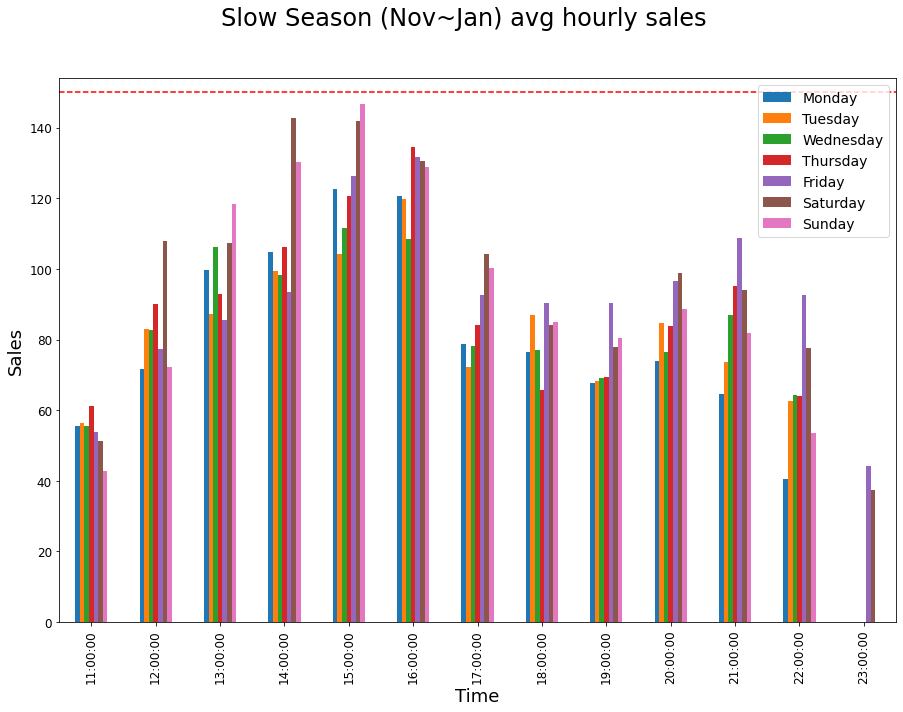

In [50]:
#let's make bar graphs with x being hours of the day, y being sales
#begin with the slow season
#defining plot type, sizes
ax = slow_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Slow Season (Nov~Jan) avg hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Slow Season Bar.png')

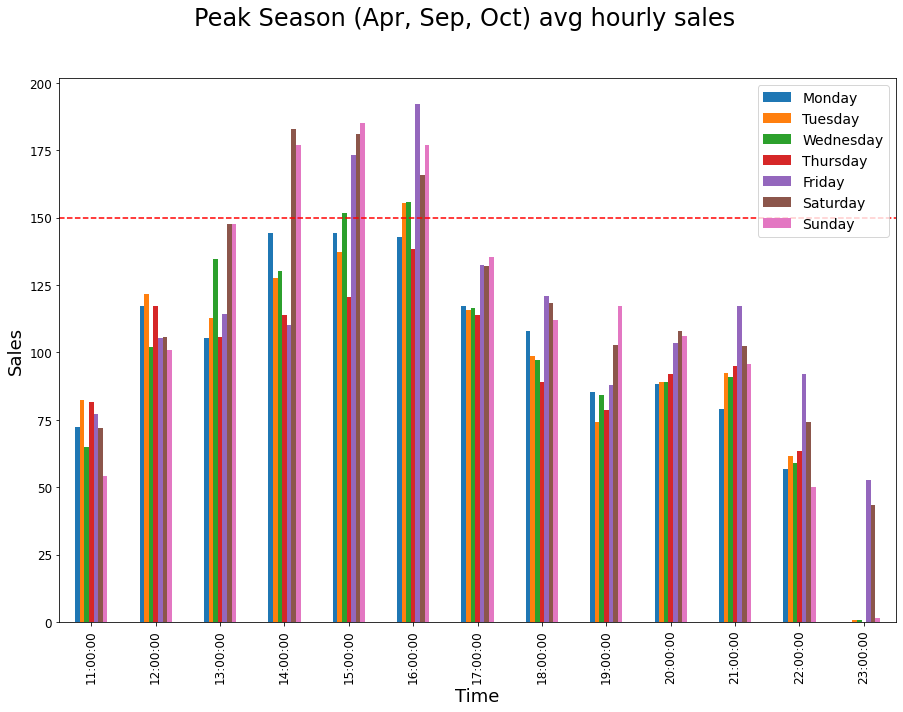

In [51]:
#peak season
#defining plot type, sizes
ax = peak_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Peak Season (Apr, Sep, Oct) avg hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Peak Season Bar.png')

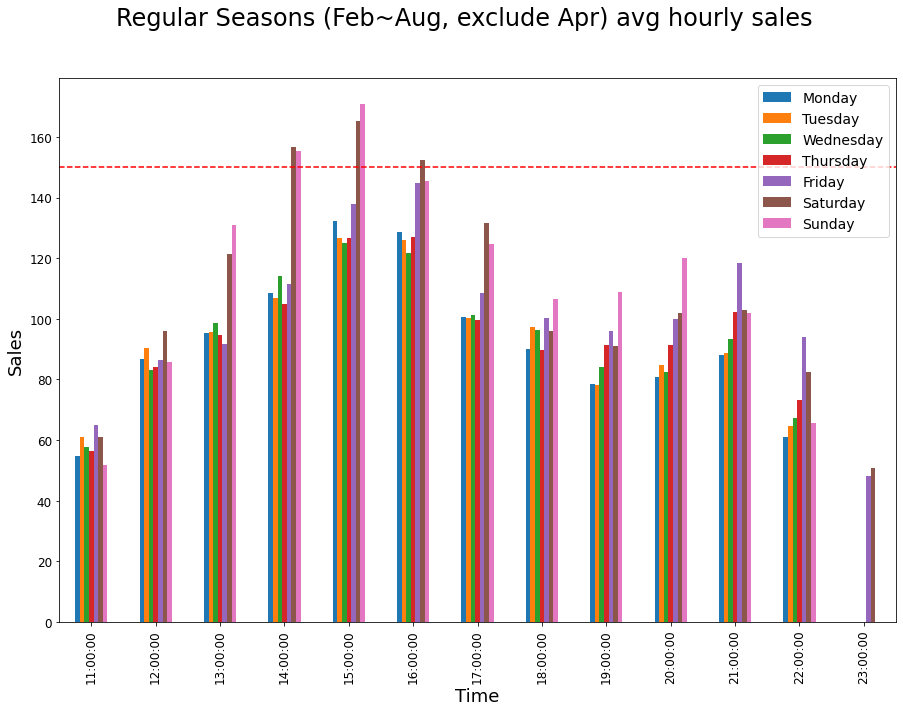

In [52]:
#regular season
#defining plot type, sizes
ax = fa_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Regular Seasons (Feb~Aug, exclude Apr) avg hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Summer Season Bar.png')

## Modeling
Holt Winter’s Exponential Smoothing (HWES)
The method is suitable for univariate time series with trend and/or seasonal components

We'll use it on the dataframe with rows in timeseries and columns with the whole day's sales.

In [53]:
#recall that df24 consist of the requirement
df24.head()

Time        11:00:00  12:00:00  13:00:00  14:00:00  15:00:00  16:00:00  \
Date                                                                     
2016-01-04     16.39     36.27     78.68     51.44     57.70    148.93   
2016-01-05     22.45     27.75      7.25     30.64    100.67    149.72   
2016-01-06     33.59     41.48    111.56     92.00     94.83     94.27   
2016-01-07      8.40     23.30     54.49     42.28    116.13    101.65   
2016-01-08     27.25     86.00     48.34     65.21    186.20    158.67   

Time        17:00:00  18:00:00  19:00:00  20:00:00  21:00:00  22:00:00  \
Date                                                                     
2016-01-04     74.55     50.34     56.02     79.35     58.34     31.68   
2016-01-05     43.14     68.53     93.65     75.90     27.45     31.70   
2016-01-06     45.26     70.35     57.22     52.53     46.87     49.12   
2016-01-07     52.04     47.96    128.00     77.01     91.02     75.42   
2016-01-08     93.76    117.30    143.23    105.70    182.96     89.71   

Time        23:00:00    Daily  
Date                           
2016-01-04       NaN   739.69  
2016-01-05       NaN   678.85  
2016-01-06       NaN   789.08  
2016-01-07       NaN   817.70  
2016-01-08     64.12  1368.45

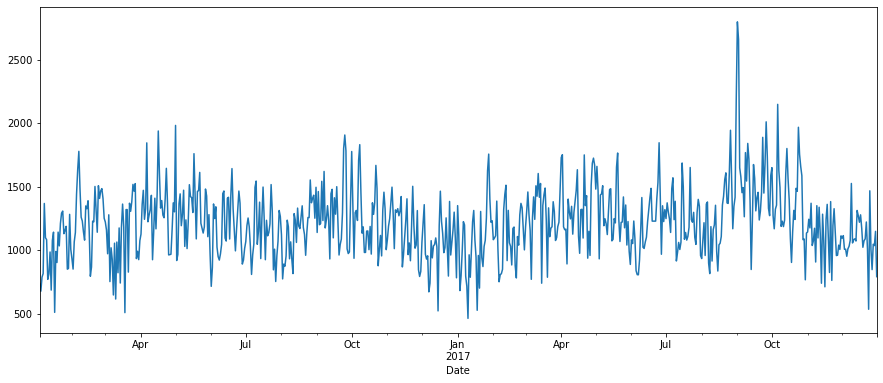

In [54]:
#a quick look at the daily sales
df24['Daily'].plot(figsize=(15, 6))
plt.show()

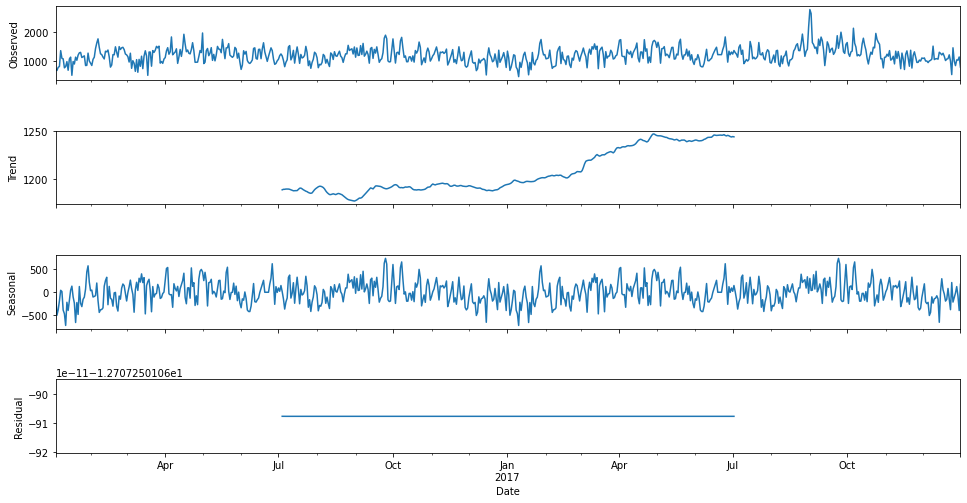

In [55]:
#decompose by frequency of 364 (since it's continous data for 2 years of 364 days)
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df24['Daily'],freq=364)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

the seasonal_decompose figures shows the data seem to have trend, but we'll use ADF-test to double check

In [57]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(df24['Daily'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.01835896725200748


In [58]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(df24['Daily'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:3.0753745250911593e-12


In [59]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(df24['Daily']['2017-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.04528669600162992


In [60]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(df24['Daily']['2017-01-01':].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:2.989999290277734e-10


the differenced ADF-testing had lower P-values, which suggest the data to have trend/seasonal.
When Original-data is not stationary and Diff-data is stationary,the time series is called unit root process.
For unit root process, it is recommended to use ARIMA or SARIMA model.

## Correlograms
Autocorrelogram & Partail Autocorrelogram is useful that to estimate each models parameaers.

In [221]:
#train_test_split
tr_start,tr_end = '2016-01-04','2017-10-30'
te_start,te_end = '2017-10-31','2017-12-31'
tra = df24['Daily'][tr_start:tr_end].dropna()
tes = df24['Daily'][te_start:te_end].dropna()

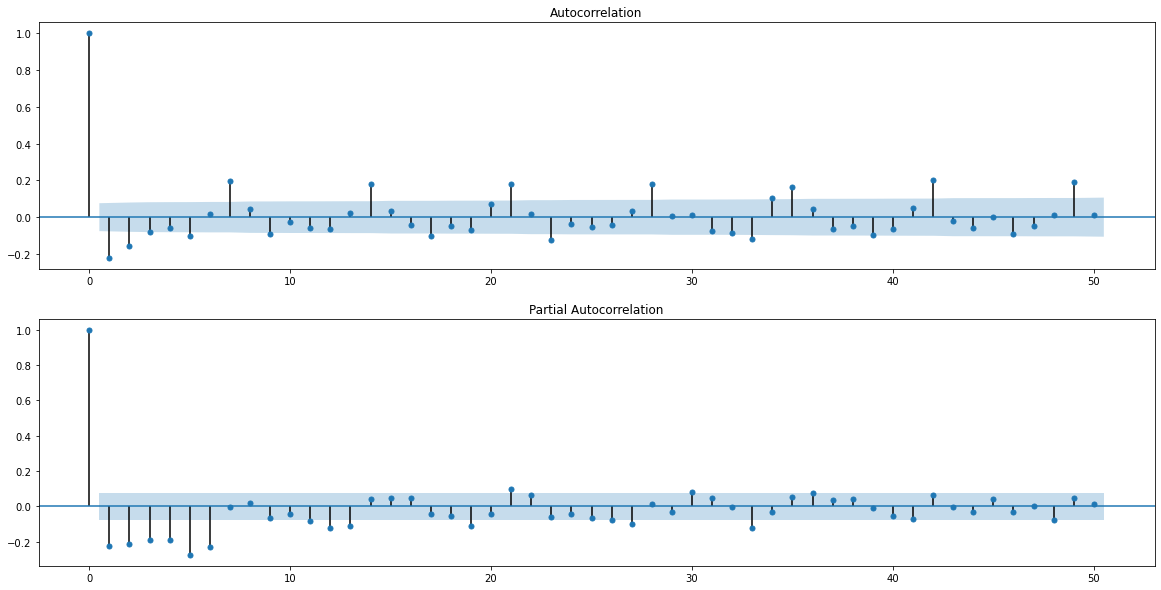

In [222]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

From Autocorrelation, we see 7 points above the blue field, and maximum of 1, suggesting ARIMA(p=7,d=1, q=?) model.

In [119]:
#use arma_order_select_ic method, to search best parameters(p,q) of ARMA model
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value en

ARMA(p,q) = (7, 6) is the best.


C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


It took a while to find the p and q, let's put it here in case we have to re-run the codes
p=7, q=6

## Arima Modeling
We'll use SARIMAX model but with 0,0,0,0 for the seasonal_order and treat it as arima

In [223]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,6),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  666
Model:               SARIMAX(7, 1, 6)   Log Likelihood               -4471.843
Date:                Wed, 08 Jul 2020   AIC                           8971.687
Time:                        00:55:04   BIC                           9034.536
Sample:                    01-04-2016   HQIC                          8996.051
                         - 10-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3925      0.510      0.770      0.441      -0.606       1.391
ar.L2         -0.4686      0.601     -0.780      0.436      -1.647       0.709
ar.L3         -0.0899      0.746     -0.121      0.904      -1.553       1.373
ar.L4         -0.3187      0.539     -0.591      0.554      -1.375       0.737
ar.L5         -0.1994      0.502     -0.397      0.691      -1.184       0.785
ar.L6          0.1866      0.155      1.201      0.230      -0.118       0.491
ar.L7          0.1236      0.062      1.983      0.047       0.001       0.246
ma.L1         -0.9625      0.511     -1.882      0.060      -1.965       0.040
ma.L2          0.4820      0.887      0.543      0.587      -1.257       2.221
ma.L3         -0.0976      0.980     -0.100      0.921      -2.018       1.823
ma.L4          0.1748      0.831      0.210      0.833      -1.455       1.804
ma.L5         -0.1036      0.639     -0.162      0.871      -1.356       1.149
ma.L6         -0.3874      0.380     -1.019      0.308      -1.133       0.358
sigma2      5.055e+04   6632.298      7.622      0.000    3.76e+04    6.35e+04
===================================================================================
Ljung-Box (Q):                       40.71   Jarque-Bera (JB):                39.67
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.23
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

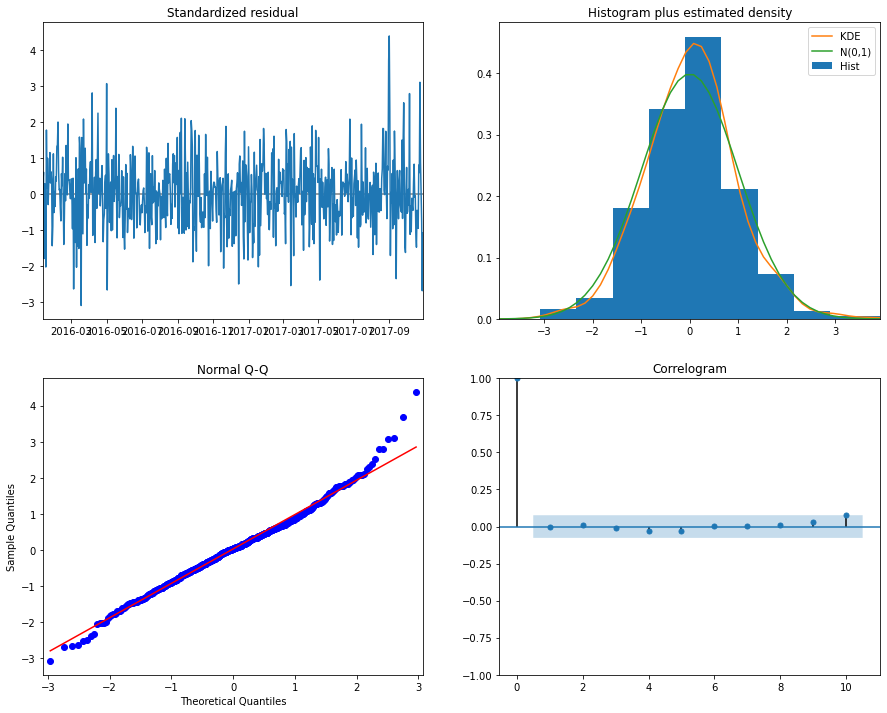

<Figure size 432x288 with 0 Axes>

In [224]:
#get the diagnostics for the model
arima.plot_diagnostics(figsize=(15, 12))
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arima_diagnostics.png')

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the top right plot, we see that the red KDE line follows pretty close with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is also an indication that the residuals are normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [225]:
#calculate the MSE
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:111247.17647265835


Consider the daily sales to have a mean of 1215, the MSE of 111247 is actually very good.

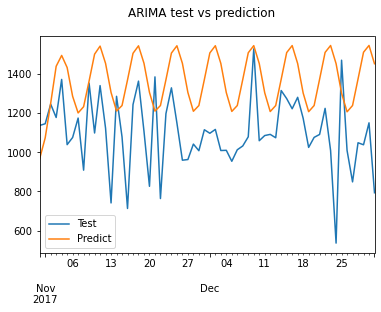

<Figure size 432x288 with 0 Axes>

In [226]:
#let's view the plot of actual data vs using model to predict from Nov2017 to end of Dec2017.
pd.DataFrame({'test':tes,'pred':pred}).plot()
plt.suptitle('ARIMA test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arima_test_pred.png')

Unfortunately the actual numbers are somewhat off (over estimate), but the trend seems to be correct; they are going to same direction in most cases, as you can see the tips of the prediction graph there's also a tip in the actualy test.

## Seasonal Autoregressive Integrated Moving-Average (SARIMA) Modeling
seasonal_order we know p=7, d=1, q=6, the season we can choose 1 for yearly, 4 for quarterly, 12 for monthly, 52 for weekly,
and 365 for daily. Due to memory and loading time, we're be using 1 for yearly.

In [227]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,6),seasonal_order=(7,1,6,1),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarima.summary()

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Daily   No. Observations:                  666
Model:             SARIMAX(7, 1, 6)x(7, 1, 6, 1)   Log Likelihood               -4462.560
Date:                           Wed, 08 Jul 2020   AIC                           8979.120
Time:                                   00:56:15   BIC                           9099.998
Sample:                               01-04-2016   HQIC                          9026.006
                                    - 10-30-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1360     26.670     -0.043      0.966     -53.409      51.137
ar.L2         -0.8849     44.369     -0.020      0.984     -87.847      86.078
ar.L3         -0.8471     49.787     -0.017      0.986     -98.429      96.734
ar.L4         -0.7073     44.309     -0.016      0.987     -87.551      86.136
ar.L5         -0.5234     33.455     -0.016      0.988     -66.094      65.047
ar.L6         -0.0289     22.386     -0.001      0.999     -43.905      43.847
ar.L7         -0.0665      5.263     -0.013      0.990     -10.382      10.249
ma.L1          0.4117   4812.496   8.56e-05      1.000   -9431.906    9432.730
ma.L2         -0.1420   4979.804  -2.85e-05      1.000   -9760.379    9760.095
ma.L3         -0.0521   5346.052  -9.75e-06      1.000   -1.05e+04    1.05e+04
ma.L4         -0.1414   5516.900  -2.56e-05      1.000   -1.08e+04    1.08e+04
ma.L5         -0.2253   5793.489  -3.89e-05      1.000   -1.14e+04    1.14e+04
ma.L6         -0.5693   6248.169  -9.11e-05      1.000   -1.22e+04    1.22e+04
ar.S.L1       -1.1419     26.658     -0.043      0.966     -53.390      51.106
ar.S.L2       -0.8771     44.855     -0.020      0.984     -88.792      87.038
ar.S.L3       -0.8549     50.404     -0.017      0.986     -99.645      97.935
ar.S.L4       -0.6995     44.637     -0.016      0.987     -88.186      86.787
ar.S.L5       -0.5312     33.433     -0.016      0.987     -66.059      64.996
ar.S.L6       -0.0202     22.371     -0.001      0.999     -43.867      43.826
ar.S.L7       -0.0742      5.145     -0.014      0.988     -10.158      10.010
ma.S.L1        0.4117   4812.474   8.56e-05      1.000   -9431.863    9432.687
ma.S.L2       -0.1420   4979.813  -2.85e-05      1.000   -9760.397    9760.113
ma.S.L3       -0.0521   5346.096  -9.75e-06      1.000   -1.05e+04    1.05e+04
ma.S.L4       -0.1414   5516.883  -2.56e-05      1.000   -1.08e+04    1.08e+04
ma.S.L5       -0.2253   5793.415  -3.89e-05      1.000   -1.14e+04    1.14e+04
ma.S.L6       -0.5693   6248.116  -9.11e-05      1.000   -1.22e+04    1.22e+04
sigma2      5.709e+04   3514.298     16.244      0.000    5.02e+04     6.4e+04
===================================================================================
Ljung-Box (Q):                      103.06   Jarque-Bera (JB):                17.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.15
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.2e+17. Standard errors may be unstable.
"""

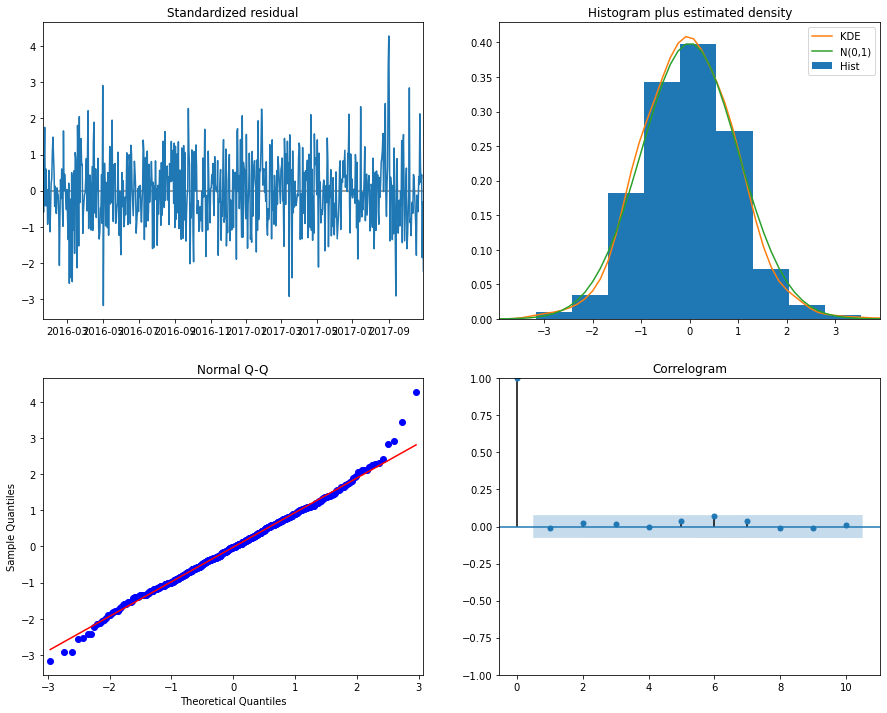

<Figure size 432x288 with 0 Axes>

In [228]:
#get the diagnostics for the model
sarima.plot_diagnostics(figsize=(15, 12))
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarima_diagnostics.png')

We have better results than Arima! Look at the top right figure. The KDE and N(0, 1) are much closer than the Armia's figure.

In [229]:
#calculate the MSE
from sklearn.metrics import mean_squared_error
pred = sarima.predict(tr_end,te_end)[1:]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMAX model MSE:70568.02848656024


Lower MSE than using Arima

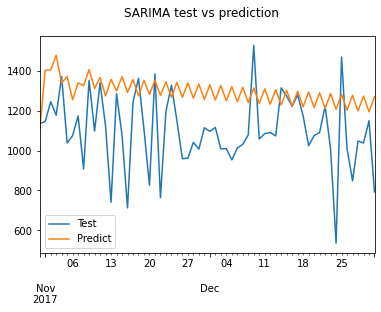

<Figure size 432x288 with 0 Axes>

In [230]:
pd.DataFrame({'test':tes,'pred':pred}).plot()
plt.suptitle('SARIMA test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarima_test_pred.png')
plt.show()

Thre's a lot of up and downs, which does make sense since the day of the week has great influence on sales (we know that from earlier exploratory analysis). Though the plots look very different, the actual values are closer than the predictions made by Arima.

## Features and ARIMAX Model
We'll plot some features first so we can use the ARIMAX Model

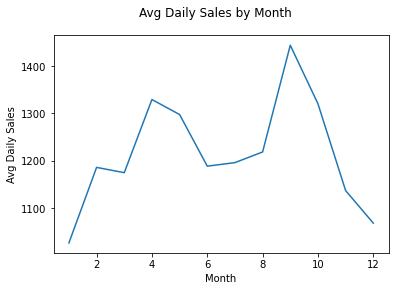

<Figure size 432x288 with 0 Axes>

In [231]:
#sales by month
df24['Daily'].groupby(df24['Daily'].index.month).mean().plot()
plt.suptitle('Avg Daily Sales by Month')
plt.xlabel('Month')
plt.ylabel('Avg Daily Sales')
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\avg_daily_sales_by_month.png')

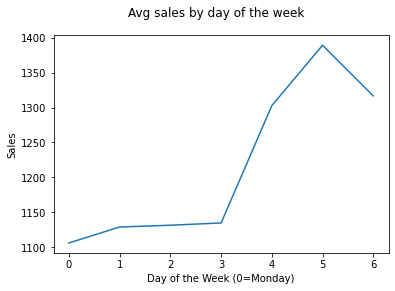

<Figure size 432x288 with 0 Axes>

In [232]:
#sales by day of the week
df24['Daily'].groupby(df24['Daily'].index.weekday).mean().plot()
plt.suptitle('Avg sales by day of the week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Sales')
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\avg_sales_by_day_of_the_week.png')

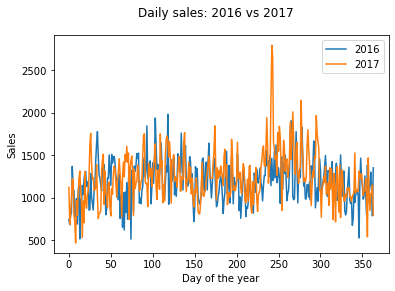

<Figure size 432x288 with 0 Axes>

In [233]:
#2016 and 2017 comparison
plt.plot(df24['Daily'][0:364].dropna().values)
plt.plot(df24['Daily'][364:728].dropna().values)
plt.suptitle('Daily sales: 2016 vs 2017')
plt.xlabel('Day of the year')
plt.ylabel('Sales')
plt.legend(["2016", "2017"]) 
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\2016_vs_2017_daily_sales.png')

In [234]:
#create another df and add the above features
buf = df24
#month one hot encoding
buf['month'] = buf.index.month
month_dummies = pd.get_dummies(buf['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
buf = pd.concat([buf, month_dummies], axis=1).drop(['month'],axis=1)
#dayofweek one hot encoding
buf['dayofweek'] = buf.index.weekday
week_dummies = pd.get_dummies(buf['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
buf = pd.concat([buf, week_dummies], axis=1).drop(['dayofweek'],axis=1)
#Satday,Sunday
buf['weekend'] = (buf.index.dayofweek>4).astype(int)#Satday,Sunday
#Sunday
#buf['sunday'] = (buf.index.dayofweek==6).astype(int)#Satday,Sunday

In [235]:
#re do test and train data
tr_start,tr_end = '2015-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
tra = df24['Daily'][tr_start:tr_end].dropna()
tes = df24['Daily'][te_start:te_end].dropna()
exog_train = buf[['month-1','month-2','month-3','month-4','month-5','month-6','month-7','month-8','month-9','month-10',
                 'month-11','month-12','dayofweek-0','dayofweek-1','dayofweek-2', 'dayofweek-3', 'dayofweek-4',
                 'dayofweek-5','dayofweek-6','weekend']][tr_start:tr_end].dropna()
exog_test = buf[['month-1','month-2','month-3','month-4','month-5','month-6','month-7','month-8','month-9','month-10',
                 'month-11','month-12','dayofweek-0','dayofweek-1','dayofweek-2', 'dayofweek-3', 'dayofweek-4',
                 'dayofweek-5','dayofweek-6','weekend']][te_start:te_end].dropna()


##  ARIMAX Model

In [236]:
arimax = sm.tsa.statespace.SARIMAX(tra,order=(7,1,6),seasonal_order=(0,0,0,0),exog = exog_train,freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  636
Model:               SARIMAX(7, 1, 6)   Log Likelihood               -4246.037
Date:                Wed, 08 Jul 2020   AIC                           8560.074
Time:                        00:57:41   BIC                           8711.120
Sample:                    01-04-2016   HQIC                          8618.753
                         - 09-30-2017                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month-1       240.3621   5167.270      0.047      0.963   -9887.300    1.04e+04
month-2       137.0147   5159.593      0.027      0.979   -9975.602    1.02e+04
month-3        95.4395   5163.412      0.018      0.985      -1e+04    1.02e+04
month-4         9.5772   5160.641      0.002      0.999   -1.01e+04    1.01e+04
month-5       306.4037   5163.291      0.059      0.953   -9813.461    1.04e+04
month-6       172.3886   5166.429      0.033      0.973   -9953.627    1.03e+04
month-7       -74.4608   5165.107     -0.014      0.988   -1.02e+04       1e+04
month-8      -147.9193   5165.314     -0.029      0.977   -1.03e+04    9975.909
month-9      -202.1345   5161.377     -0.039      0.969   -1.03e+04    9913.978
month-10     -104.3850   5163.198     -0.020      0.984   -1.02e+04       1e+04
month-11     -237.4010   5163.137     -0.046      0.963   -1.04e+04    9882.162
month-12     -194.8851   5167.054     -0.038      0.970   -1.03e+04    9932.356
dayofweek-0   -79.8851   1.09e+04     -0.007      0.994   -2.15e+04    2.14e+04
dayofweek-1   -65.1056   1.09e+04     -0.006      0.995   -2.15e+04    2.14e+04
dayofweek-2   -44.3970   1.09e+04     -0.004      0.997   -2.15e+04    2.14e+04
dayofweek-3   -56.2475   1.09e+04     -0.005      0.996   -2.15e+04    2.14e+04
dayofweek-4   119.8977   1.09e+04      0.011      0.991   -2.13e+04    2.15e+04
dayofweek-5    96.3036   3646.502      0.026      0.979   -7050.708    7243.315
dayofweek-6    29.4340   3643.472      0.008      0.994   -7111.641    7170.509
weekend       125.7376   7289.921      0.017      0.986   -1.42e+04    1.44e+04
ar.L1           0.1134      0.991      0.114      0.909      -1.830       2.056
ar.L2          -0.5296      0.582     -0.910      0.363      -1.670       0.611
ar.L3          -0.2122      0.471     -0.450      0.653      -1.136       0.712
ar.L4           0.4259      0.419      1.016      0.310      -0.396       1.248
ar.L5          -0.5521      0.729     -0.758      0.449      -1.980       0.876
ar.L6           0.1194      0.313      0.381      0.703      -0.495       0.733
ar.L7          -0.0284      0.062     -0.456      0.649      -0.151       0.094
ma.L1          -0.6298      0.992     -0.635      0.526      -2.574       1.315
ma.L2           0.4313      0.720      0.599      0.549      -0.979       1.842
ma.L3          -0.0896      0.200     -0.448      0.654      -0.482       0.302
ma.L4          -0.6432      0.245     -2.626      0.009      -1.123      -0.163
ma.L5           0.6670      0.755      0.884      0.377      -0.812       2.146
ma.L6          -0.3490      0.695     -0.502      0.616      -1.712       1.014
sigma2       4.379e+04   2499.343     17.522      0.000    3.89e+04    4.87e+04
===================================================================================
Ljung-Box (Q):                       20.51   Jarque-Bera (JB):                30.16
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):      

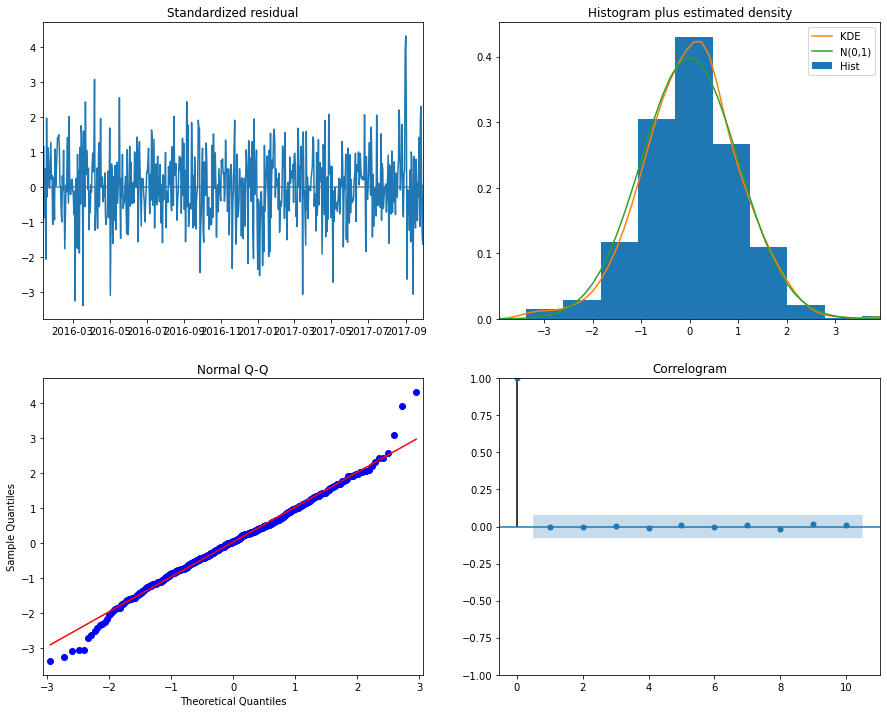

<Figure size 432x288 with 0 Axes>

In [237]:
#get the diagnostics for the model
arimax.plot_diagnostics(figsize=(15, 12))
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arimax_diagnostics.png')

In [238]:
#calculate the MSE
pred = arimax.predict(tr_end,te_end,exog = exog_test)[1:]
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMAX model MSE:171731.35583366954


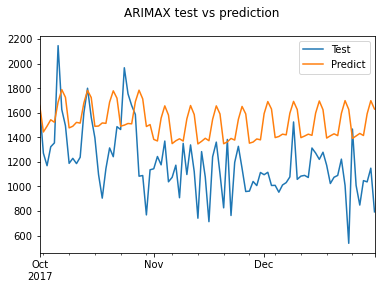

<Figure size 432x288 with 0 Axes>

In [240]:
pd.DataFrame({'test':tes,'pred':pred}).plot()
plt.suptitle('ARIMAX test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arimax_test_pred.png')

We can see the 12 ridges due to 12 weeks, and each weekend is suposed to have btter sales than weekdays.

##  SARIMAX Model

In [241]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(7,1,6),seasonal_order=(7,1,6,1),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarimax.summary()

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Daily   No. Observations:                  636
Model:             SARIMAX(7, 1, 6)x(7, 1, 6, 1)   Log Likelihood               -4219.786
Date:                           Wed, 08 Jul 2020   AIC                           8533.571
Time:                                   00:58:24   BIC                           8741.768
Sample:                               01-04-2016   HQIC                          8614.499
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month-1       232.4537   2.32e+04      0.010      0.992   -4.51e+04    4.56e+04
month-2       178.6436   2.31e+04      0.008      0.994   -4.51e+04    4.55e+04
month-3       125.2693   2.31e+04      0.005      0.996   -4.52e+04    4.54e+04
month-4      -100.4230   2.31e+04     -0.004      0.997   -4.54e+04    4.52e+04
month-5       381.1005   2.31e+04      0.016      0.987   -4.49e+04    4.57e+04
month-6       347.9105   2.31e+04      0.015      0.988    -4.5e+04    4.57e+04
month-7        17.3254   2.31e+04      0.001      0.999   -4.53e+04    4.54e+04
month-8        14.7873   2.31e+04      0.001      0.999   -4.53e+04    4.54e+04
month-9      -291.3153   2.31e+04     -0.013      0.990   -4.56e+04    4.51e+04
month-10     -180.3010   2.31e+04     -0.008      0.994   -4.55e+04    4.52e+04
month-11     -361.4019   2.31e+04     -0.016      0.988   -4.57e+04     4.5e+04
month-12     -364.0492   2.32e+04     -0.016      0.987   -4.57e+04     4.5e+04
dayofweek-0   -81.4587   4.75e+04     -0.002      0.999   -9.31e+04    9.29e+04
dayofweek-1   -66.2173   4.75e+04     -0.001      0.999   -9.31e+04     9.3e+04
dayofweek-2   -46.9170   4.75e+04     -0.001      0.999   -9.31e+04     9.3e+04
dayofweek-3   -56.9394   4.75e+04     -0.001      0.999   -9.31e+04     9.3e+04
dayofweek-4   123.6479   4.75e+04      0.003      0.998   -9.29e+04    9.31e+04
dayofweek-5    98.9699   1.58e+04      0.006      0.995   -3.09e+04    3.11e+04
dayofweek-6    28.9146   1.58e+04      0.002      0.999    -3.1e+04     3.1e+04
weekend       127.8845   3.16e+04      0.004      0.997   -6.19e+04    6.21e+04
ar.L1          -0.2087   2.77e+04  -7.53e-06      1.000   -5.43e+04    5.43e+04
ar.L2           0.0500   3.16e+04   1.58e-06      1.000   -6.19e+04    6.19e+04
ar.L3          -0.3814   2.31e+04  -1.65e-05      1.000   -4.53e+04    4.53e+04
ar.L4           0.1646   3.08e+04   5.34e-06      1.000   -6.04e+04    6.04e+04
ar.L5           0.4594   2.16e+04   2.13e-05      1.000   -4.24e+04    4.24e+04
ar.L6          -0.0007   1.35e+04  -4.92e-08      1.000   -2.65e+04    2.65e+04
ar.L7           0.0199   4810.238   4.15e-06      1.000   -9427.872    9427.912
ma.L1          -0.5699     46.687     -0.012      0.990     -92.074      90.934
ma.L2          -0.3495     63.743     -0.005      0.996    -125.283     124.584
ma.L3           0.3735     38.461      0.010      0.992     -75.009      75.756
ma.L4          -0.4840     39.488     -0.012      0.990     -77.879      76.911
ma.L5          -0.4191     44.435     -0.009      0.992     -87.511      86.673
ma.L6           0.3716     25.359      0.015      0.988     -49.330      50.074
ar.S.L1        -0.2087   2.77e+04  -7.53e-06      1.000   -5.43e+04    5.43e+04
ar.S.L2         0.0500   3.16e+04   1.58e-06      1.000   -6.19e+04    6.19e+04
ar.S.L3        -0.3814   2.31e+04  -1.65e-05      1.000   -4.53e+04    4.53e+04
ar.S.L4         0.1646

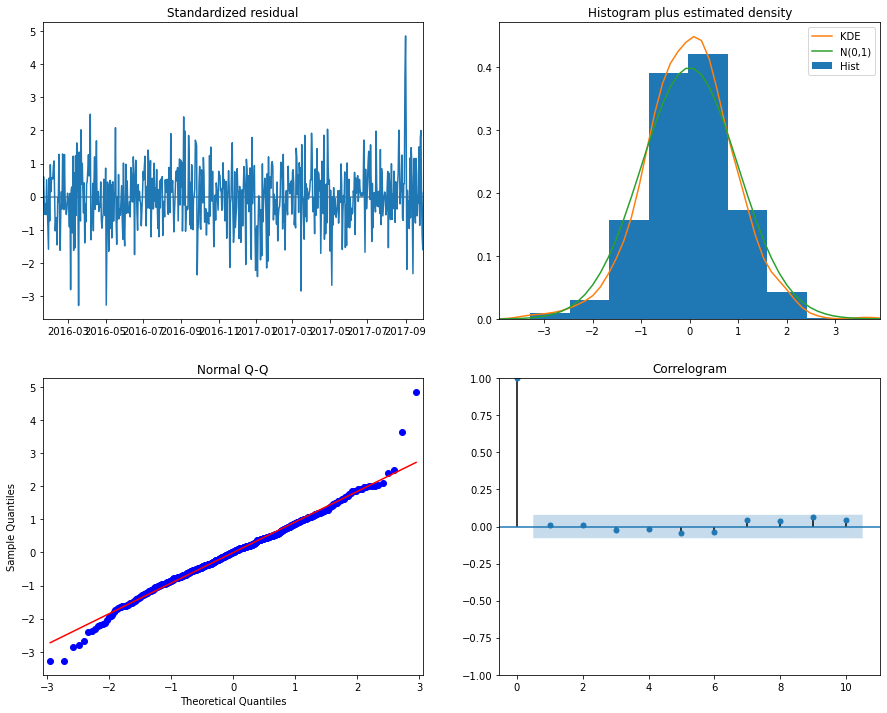

<Figure size 432x288 with 0 Axes>

In [242]:
#get the diagnostics for the model
sarimax.plot_diagnostics(figsize=(15, 12))
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarimax_diagnostics.png')

In [243]:
#calculate the MSE
pred = sarimax.predict(tr_end,te_end,exog = exog_test)[1:]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMAX model MSE:131591.51749926733


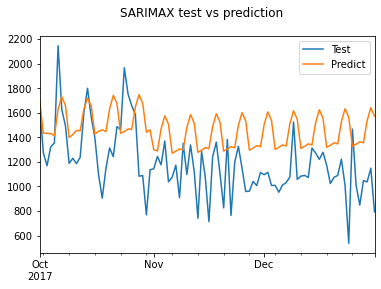

<Figure size 432x288 with 0 Axes>

In [245]:
pd.DataFrame({'test':tes,'pred':pred}).plot()
plt.suptitle('SARIMAX test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.show()
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarimax_test_pred.png')

In [247]:
#save this model
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\models/SARIMAX_model_store_sales_prediction.joblib') 

['C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\models/SARIMAX_model_store_sales_prediction.joblib']

##  Documentation

Arima Model was an obvious overestimate but with correct trend.
Sarima Model had the lowest MSE, and had the general correct trend of having sales declining... but with way too much zig-zag.
Arimax Model has taken month, day of week, and weekend into account, and thus is an overall better model than Arima with much more accuracy, but does have slightly higher MSE than Arima Model.
Sarimax Model is like a better version of Arimax Model (same trends/curves but closer to the actual Test value).

The best prediction model will be the Sarimax Model, because it has taken several features into factor that makes the predictions much more acurately, and SARIM is more suited for seaonsal influenced data such as sales.

From the Exploratory analysis we have concluded the following variables to be influcning the sales.
Month, Day of the week, and Hour of the Day

Since Month is an influence, we have use statistics and get the below 25% IQR months to be the slow month (November to January), and should have the store hours adjusted to 11AM to 11PM everyday except Friday the store should open until midnight, and two staff members at all time is enough to operate the store.
On all other months, the store should keep its current hours, which is 11AM to 11PM everyday except Friday and Saturday the store will open until midnight. However, additional staffing will be recommended for the following:
Have thrid staff from 2PM to 6PM on Wednesday and Friday. 1PM to 5PM on Saturday and Sunday for April, Septemper, and October.
Have a third staff from 2PM to 6PM on Saturday, and 1PM to 5PM on Sunday for Feb, Mar, May, Jun, Jul, and Aug.

In [253]:
#recleaned df24, let's save the csv file
df24.to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df24.csv')